# Project Overview 

Database ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih

## Informasi Attribute

1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

## Tujuan Final Project 2

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM
sebagai berikut:
<ul>
<li>Mampu memahami konsep Classification dengan Logistic Regression dan SVM</li>
<li>Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression
dan SVM</li>
<li>Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat
prediks</li>
</ul>

# Import Libraries 

In [1]:
# Pustaka Pengelolaan Data
import pandas as pd
import numpy as np

# Pustaka Untuk Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pustaka Untuk Proses Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from scipy.stats import skew
from scipy import stats

# model
import warnings
import pickle

# Data Loading

In [2]:
# membuat columns dataset full
pd.set_option('display.max_columns', None)

# handle understaning missing value
missing_values = ['na', "NA", 'NaN','-']

# load data
df = pd.read_csv('weatherAUS.csv', na_values=missing_values)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
#cek baris dan kolom
baris,kolom = df.shape
print('Dataset ini terdapat: ')
print('Jumlah baris:', baris)
print('Jumlah kolom:', kolom)

Dataset ini terdapat: 
Jumlah baris: 145460
Jumlah kolom: 23


In [4]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# cek kolom
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# Melihat statistik deskriptif dari data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
# cek missing value
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terlihat bahwa dataset ini memiliki missing value yang banyak. Sehingga kita harus mengatasi hal tersebut.

In [8]:
# cek data categorical
categorical_features = df.select_dtypes(include=['object','category']).columns.tolist()
print("Jumlah fitur categorical : {}".format(len(categorical_features)))
print("Fitur categorical :", categorical_features)

Jumlah fitur categorical : 7
Fitur categorical : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [9]:
# cek data numerical
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
print("Jumlah fitur numerical: {}".format(len(numerical_features)))
print("Fitur numerical :", numerical_features)

Jumlah fitur numerical: 16
Fitur numerical : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
# cek persentase missing value
data_types = pd.DataFrame(df.dtypes, columns=['Data types'])
Null_count = pd.DataFrame(df.isnull().sum(), columns=['Null count'])                                                    
Null_Percentage = pd.DataFrame(df.isnull().sum()/df.shape[0]*100, columns=['Null Percentage'])

view_null = pd.concat([data_types, Null_count, Null_Percentage], axis='columns')
view_null

,Data types,Null count,Null Percentage
Date,object,0,0.000000
Location,object,0,0.000000
MinTemp,float64,1485,1.020899
MaxTemp,float64,1261,0.866905
Rainfall,float64,3261,2.241853
Evaporation,float64,62790,43.166506
Sunshine,float64,69835,48.009762
WindGustDir,object,10326,7.098859
WindGustSpeed,float64,10263,7.055548
WindDir9am,object,10566,7.263853


In [11]:
# cek data duplicate
df.duplicated().sum()

0

#### Analisis terhadap dataset
Semua kolom memiliki nilai nol kecuali Tanggal dan Lokasi. Kolom di bawah ini memiliki nilai null lebih dari 38%:
- sunshine - 48.009762%
- evaporation - 43.166506%
- cloud3pm - 38.421559%
- cloud3pm - 40.807095%

Dataset ini memiliki 23 kolom dan 145460 baris. Dimana terdapat 7 kolom kategori dan 16 kolom numerik. Data memiliki 16 float64 dan 7 objek.Dtype dari Datetime adalah Objek, sehingga harus diubah menjadi DateTime. Terakhir, data tidak memiliki duplikat

## Data Cleaning

Pada tahap ini akan dilakukan:
- Menghapus kolom dengan nilai null lebih dari 38%
- Menghapus semua baris di mana variabel target Null
- Ganti nilai Nan pada data Numerical menggunakan rata-rata
- Ganti nilai Nan pada data Categorical menggunakan mode
- Konversi Tanggal ke DateTime
- Membuat kolom baru dari Date
- Menghapus kolom Tanggal

In [12]:
# Menghapus kolom dengan nilai null lebih dari 38%
null_pct = df.apply(pd.isnull).sum()/df.shape[0]
valid_col = df.columns[null_pct < 0.38]

print('Sekarang memiliki {} kolom'.format(len(valid_col)))
print(valid_col)

Sekarang memiliki 19 kolom
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [13]:
df = df[valid_col]

In [14]:
#cek baris dan kolom
baris,kolom = df.shape
print('Dataset ini terdapat: ')
print('Jumlah baris:', baris)
print('Jumlah kolom:', kolom)

Dataset ini terdapat: 
Jumlah baris: 145460
Jumlah kolom: 19


In [15]:
# Menghapus semua baris di mana variabel target Null
df = df.dropna(subset=['RainTomorrow'], axis=0)

In [16]:
# buat kolom baru numeric
num_col = [col for col in df.columns if df[col].dtypes !='O']
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [17]:
# handle missing value numerical
df[num_col] = df[num_col].fillna(df[num_col].median())

In [18]:
# ambil kolom categorical
cat_col = [col for col in df.columns if df[col].dtypes =='O']

# handle missing value categorical
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [19]:
# cek missing value setelah di handle
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Dataset sekarang sudah tidak memiliki missing value. Selanjutnya akan dilakukan proses convert Date ke datetime.

In [20]:
# convert date to datetime
df['Date']= pd.to_datetime(df['Date'])

In [21]:
# buat kolom baru dari date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.weekday
df['Day'] = df['Date'].dt.day

In [22]:
# hapus kolom date
df.drop('Date', axis=1, inplace=True)

In [23]:
valid_col = df
df.shape

(142193, 22)

In [24]:
# cek info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   WindGustDir    142193 non-null  object 
 5   WindGustSpeed  142193 non-null  float64
 6   WindDir9am     142193 non-null  object 
 7   WindDir3pm     142193 non-null  object 
 8   WindSpeed9am   142193 non-null  float64
 9   WindSpeed3pm   142193 non-null  float64
 10  Humidity9am    142193 non-null  float64
 11  Humidity3pm    142193 non-null  float64
 12  Pressure9am    142193 non-null  float64
 13  Pressure3pm    142193 non-null  float64
 14  Temp9am        142193 non-null  float64
 15  Temp3pm        142193 non-null  float64
 16  RainToday      142193 non-null  object 
 17  RainTomorrow   142193 non-nul

# EDA (Exploratory Data Analysis)

#### 1. Tahun berapa yang memiliki curah hujan yang tertinggi?

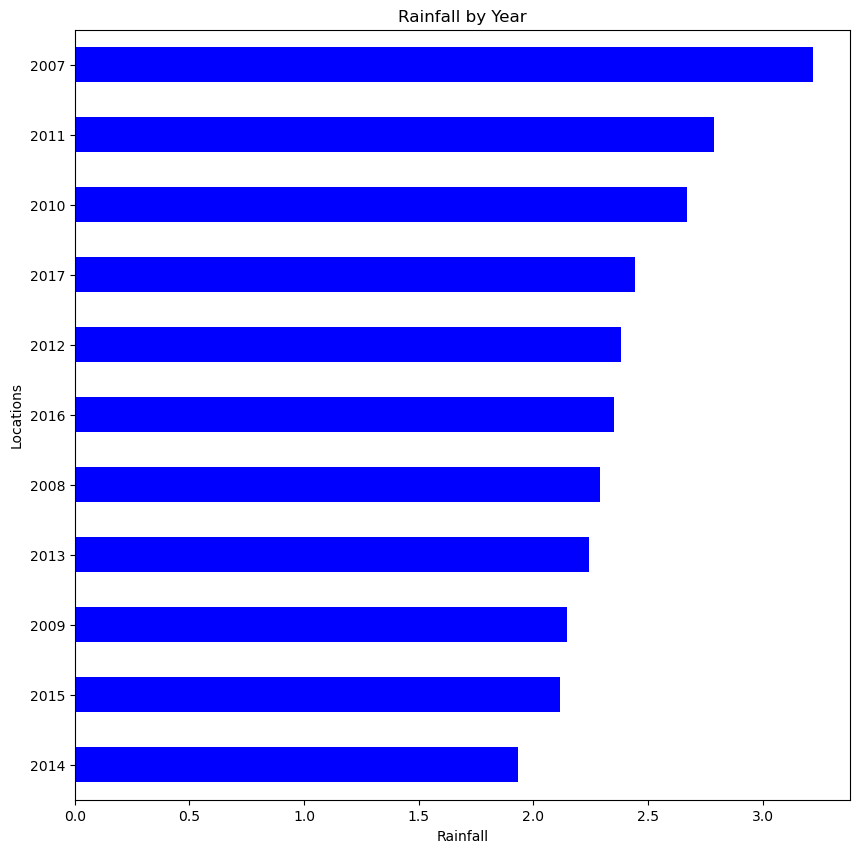

In [25]:
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Year')['Rainfall'].mean().sort_values().plot(kind='barh', color= 'blue')

plt.title('Rainfall by Year')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

**Insight:**  2007 menjadi tahun yang memiliki curah hujan yang tinggi dan 2014 menjadi tahun yang memiliki curah hujan yang rendah.

#### 2.Bulan apa yang mendapat curah hujan tertinggi?

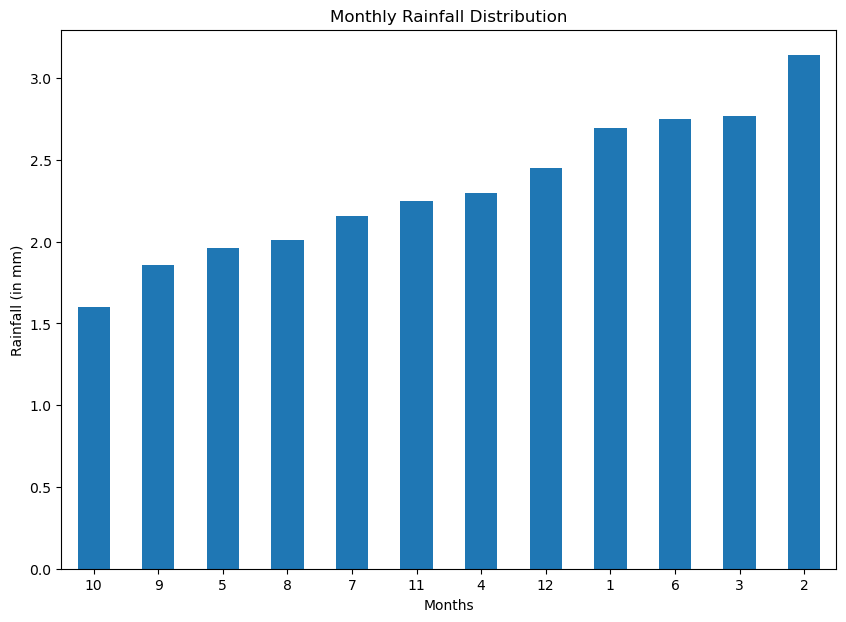

In [26]:
plt.figure(figsize=(10,7))
df.groupby('Month')['Rainfall'].mean().sort_values().plot(kind='bar')

plt.title('Monthly Rainfall Distribution', fontsize=12)
plt.xlabel('Months')
plt.ylabel('Rainfall (in mm)')

plt.xticks(rotation=0)

plt.show()

**Insight:** Bulan februari menjadi bulan yang mendapatkan curah hujan yang tinggi dan bulan oktober menjadi bulan yang curah hujannya rendah.

#### 3. Hari apa yang menerima curah hujan tertinggi?

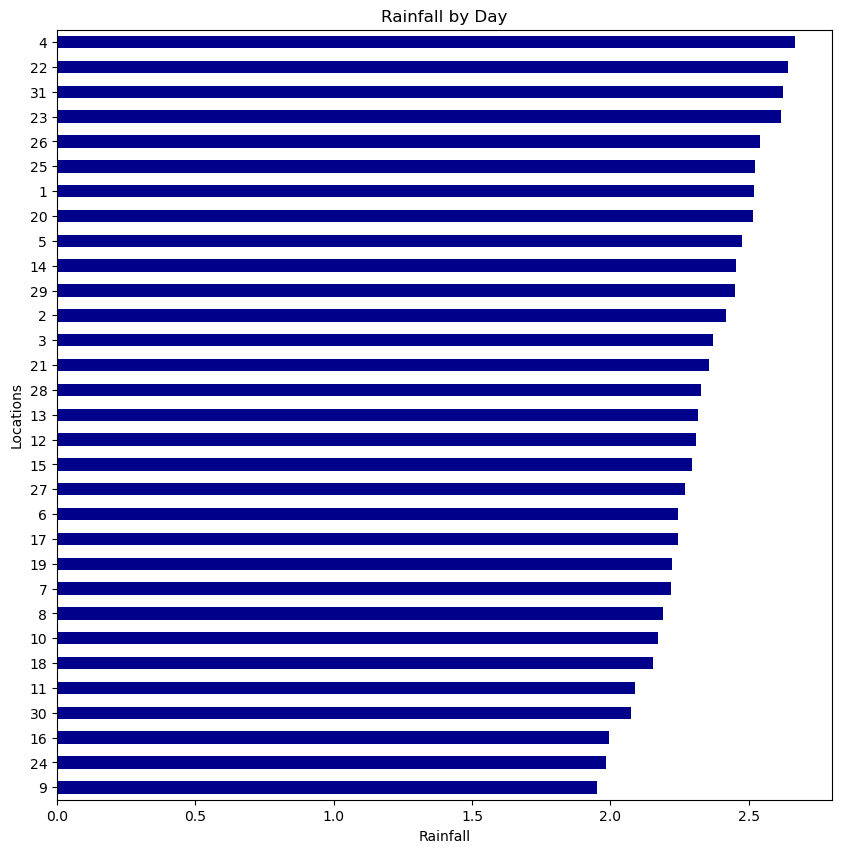

In [27]:
# Rainfall by Year
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Day')['Rainfall'].mean().sort_values().plot(kind='barh', color= 'darkblue')

plt.title('Rainfall by Day')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

**Insight:** Setiap tanggal 4 curah hujan selalu tinggi dan tanggal 9 curah hujannya paling rendah.

#### 4. Lokasi mana yang menerima curah hujan tertinggi?

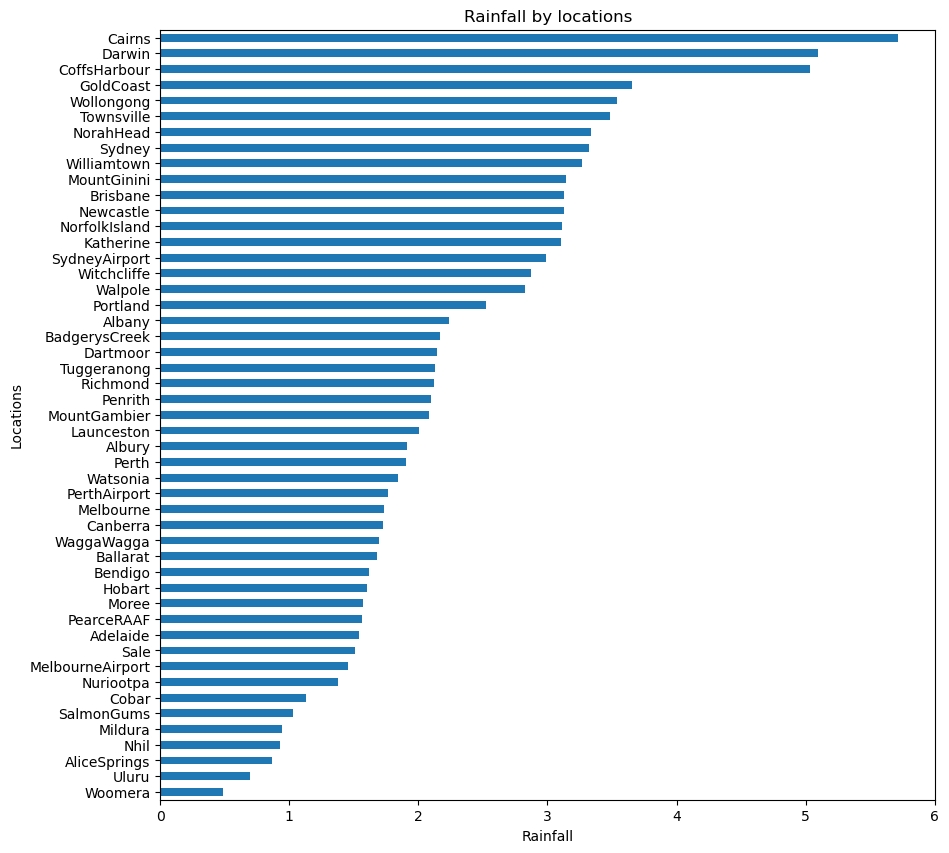

In [28]:
plt.figure(figsize=(10, 10))

location_rain = df.groupby('Location')['Rainfall'].mean().sort_values().plot(kind='barh')

plt.title('Rainfall by locations')
plt.xlabel('Rainfall', fontsize=10)
plt.ylabel('Locations', fontsize=10)
plt.show()

**Insight:** Wilayah Cairns menjadi wilayah yang mendapatkan curah hujan yang tinggi dan wilayah Woomera mendapatkan curah hujan yang rendah.

In [29]:
# cek kolom numerical untuk melihat outliers
numerical_col_new = df[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am',
                        'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                        'Pressure3pm','Temp9am','Temp3pm','Year','Month','Day', 'Week']]
numerical_col_new


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,Week
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,2008,12,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,2008,12,2,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,2008,12,3,2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,2008,12,4,3
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,2008,12,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,2017,6,20,1
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,2017,6,21,2
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,2017,6,22,3
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,2017,6,23,4


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

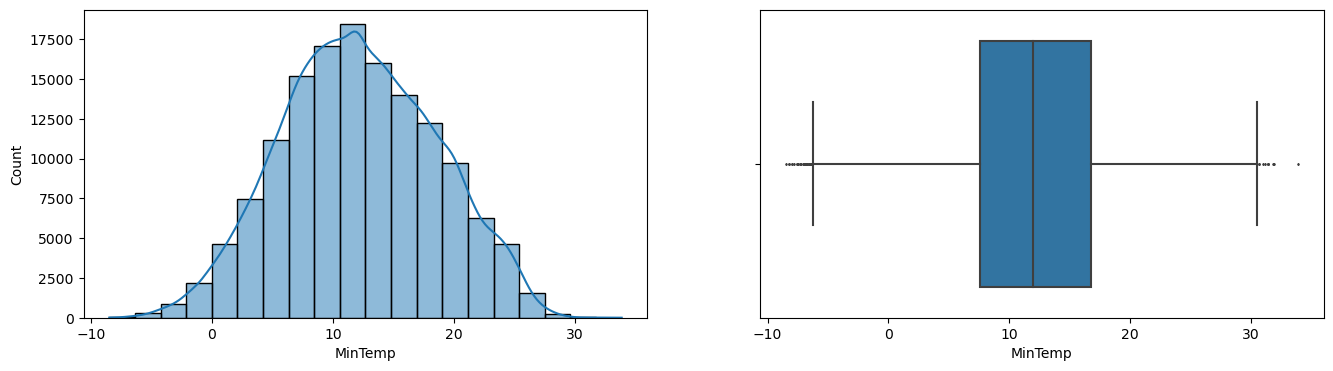

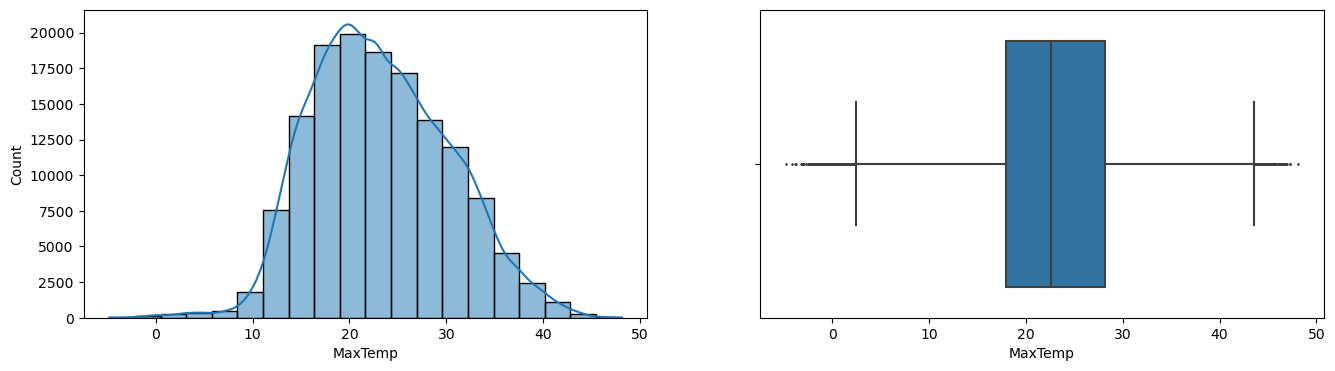

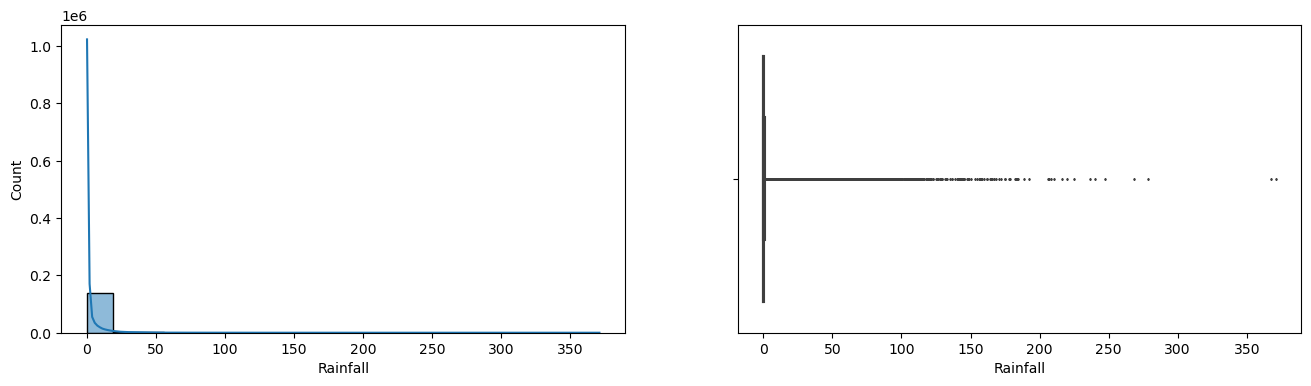

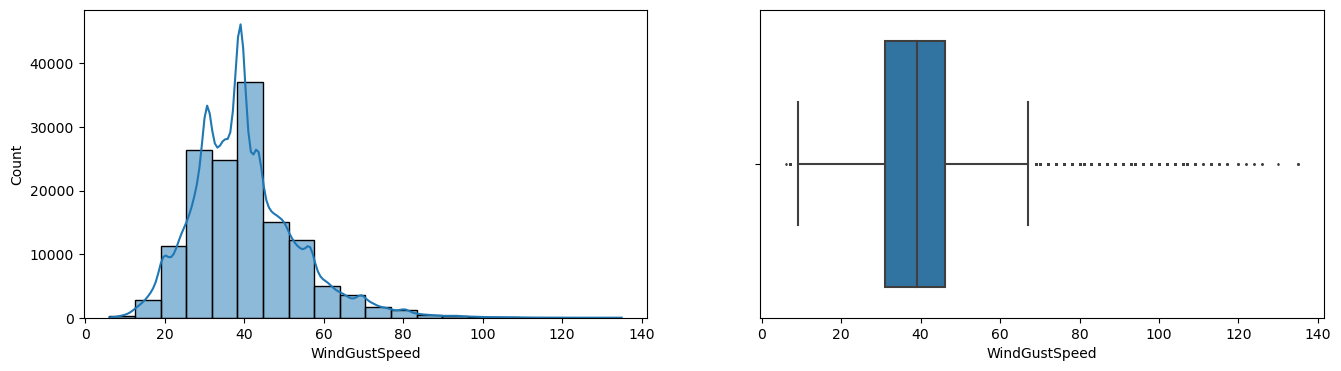

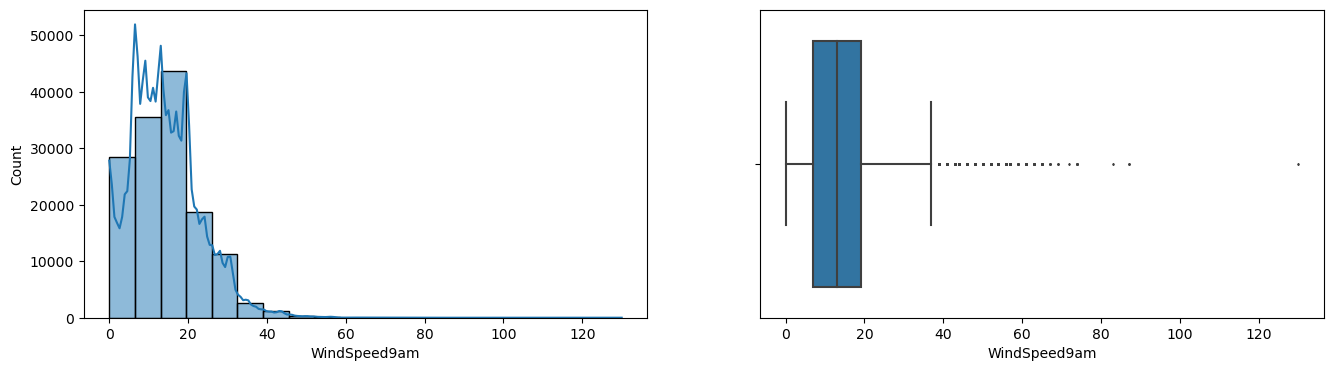

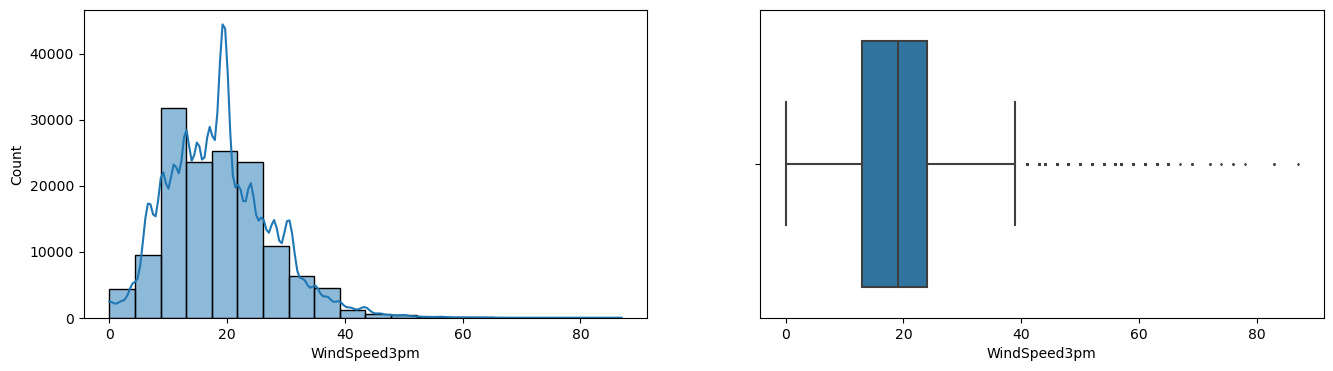

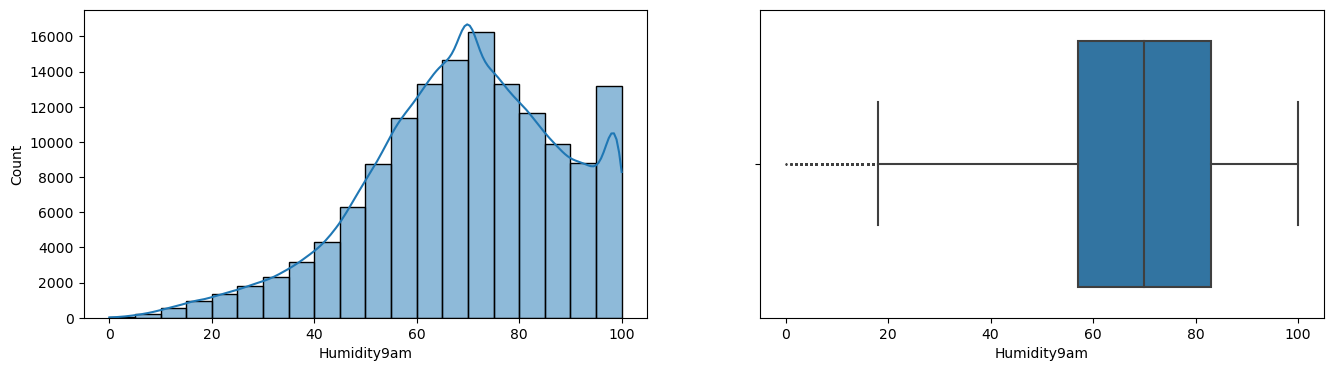

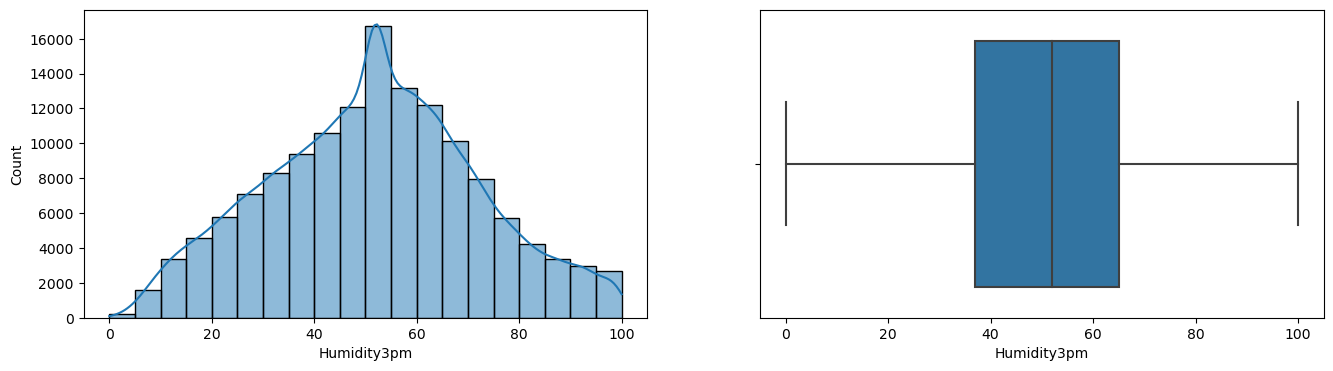

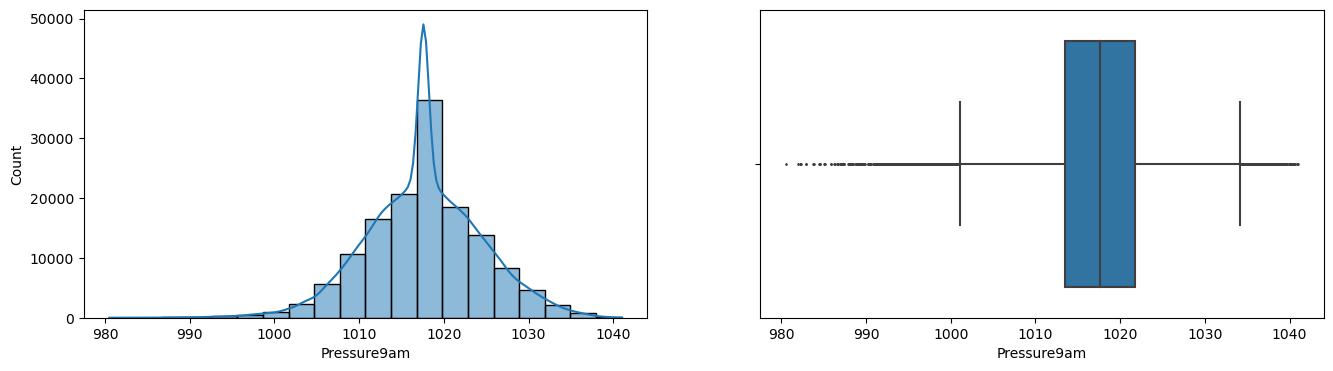

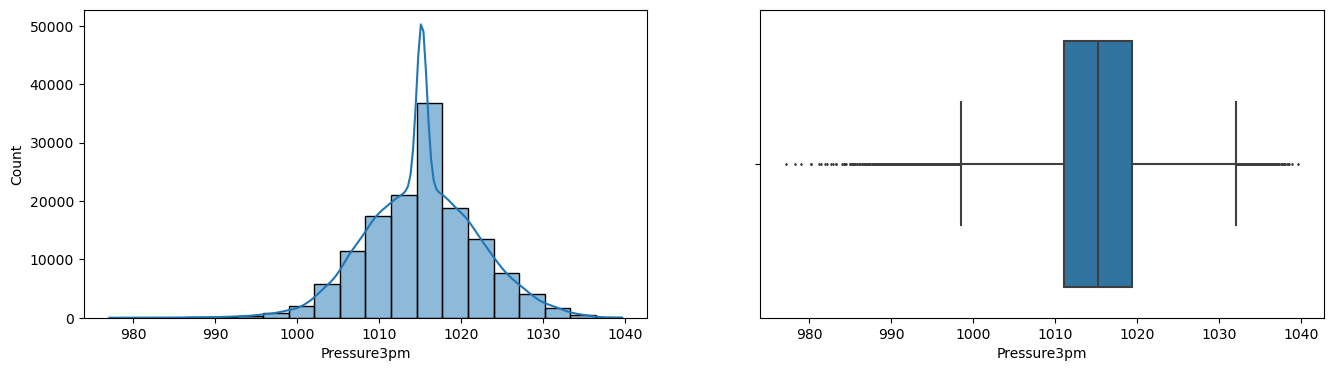

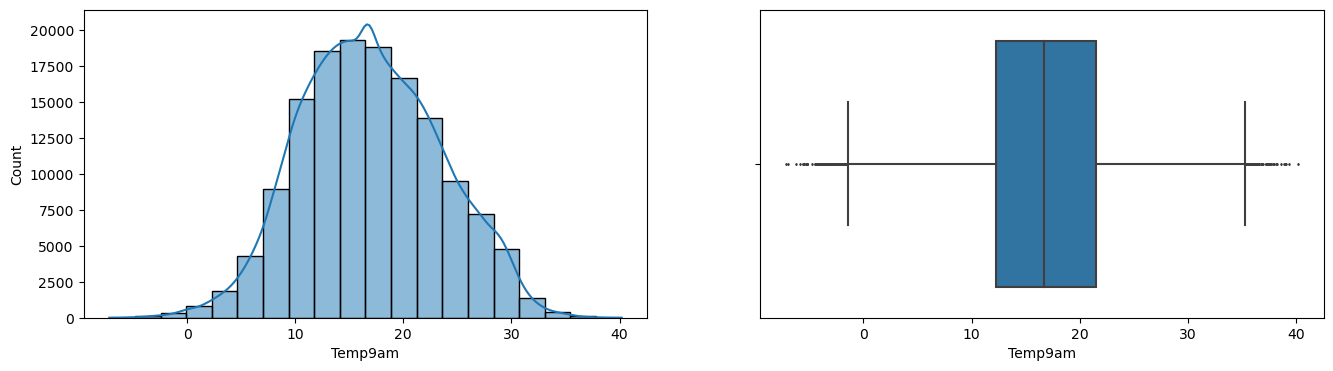

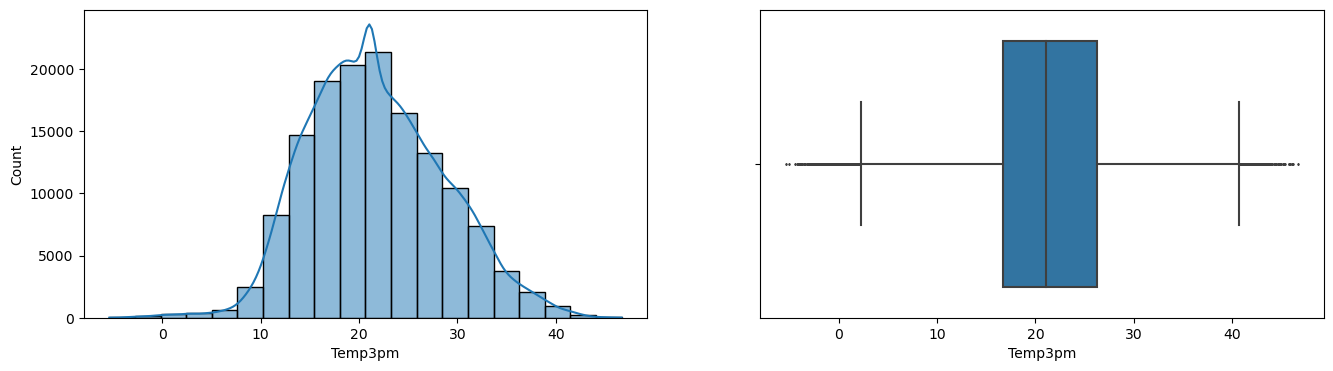

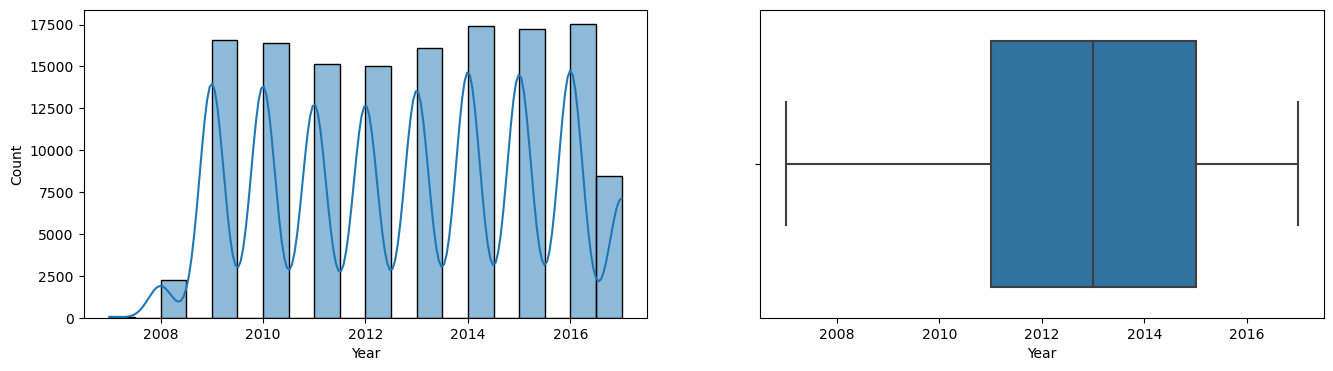

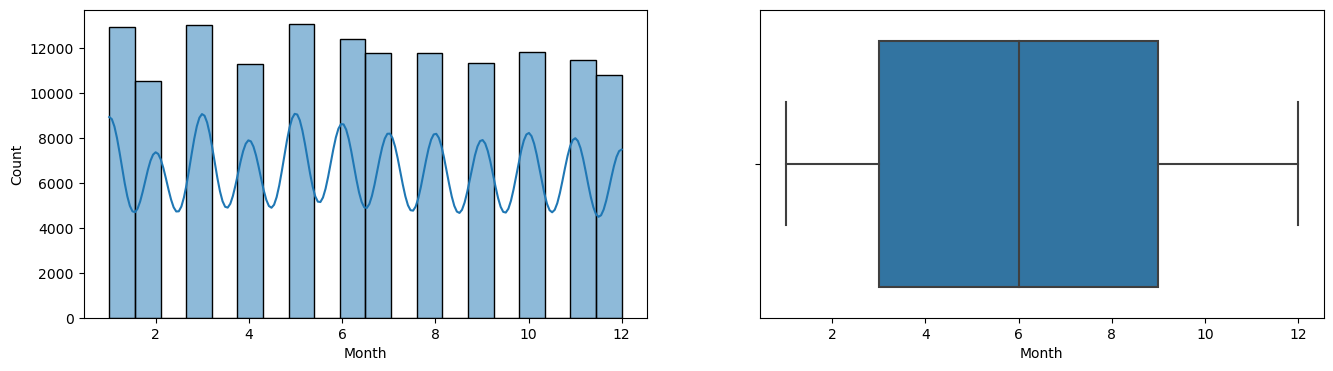

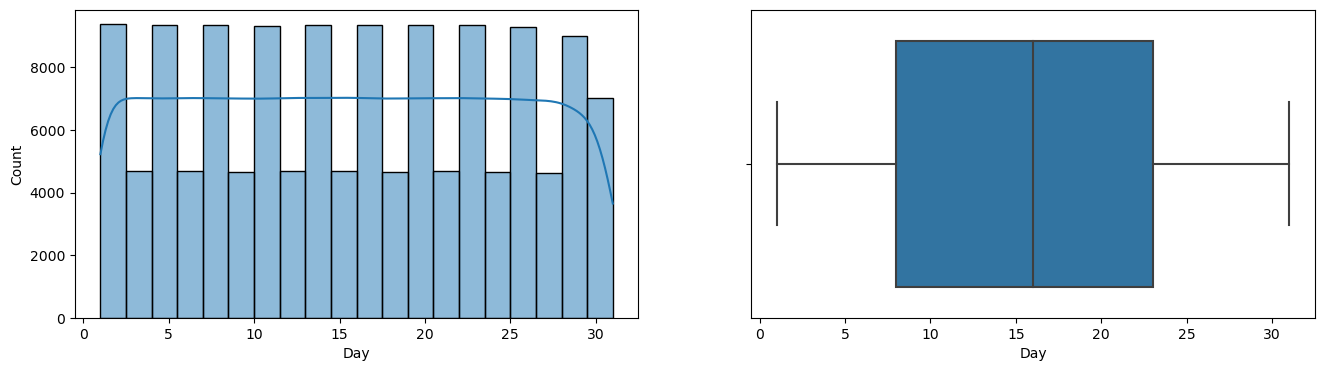

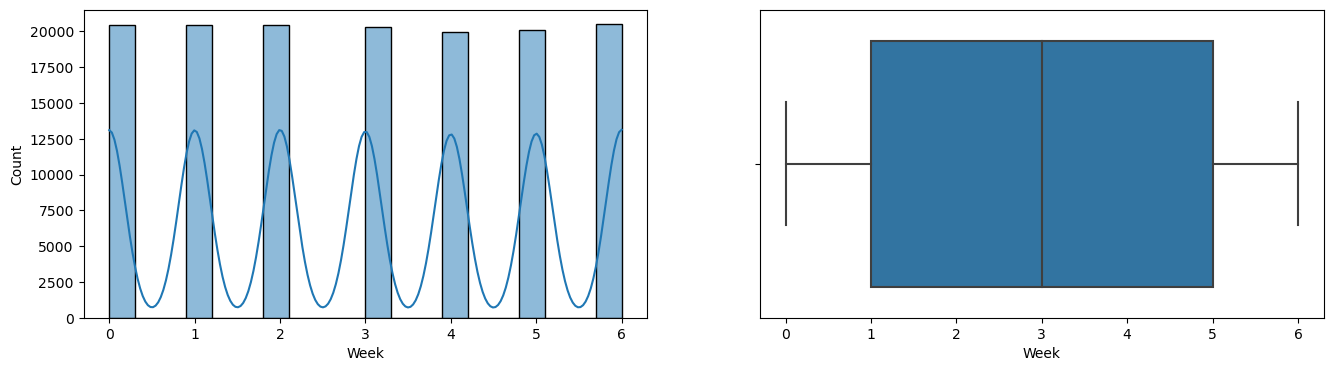

In [30]:
# Histogram dan Boxplot dari kolom numerical untuk melihat outliers
for col in numerical_col_new:
    fig, ax = plt.subplots(1,2, figsize=(16, 4))

    sns.histplot(df[col], bins=20, kde=True, ax=ax[0])
    
    sns.boxplot(df[col], fliersize=1, ax=ax[1])

**Insight:** Semua kolom numerik memiliki beberapa outlier kecuali; Humididty3pm, WindGustSpeed, Year, Month and Day.

#### 5. Berapa jumlah data "Yes" dan "No" untuk atribut "RainTomorrow?"

<AxesSubplot:>

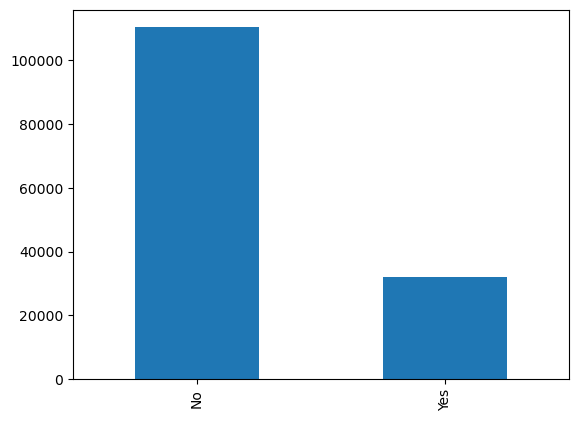

In [31]:
df['RainTomorrow'].value_counts().plot(kind='bar')

# Data Preprocessing

In [32]:
# hapus outlier pada kolom numerical
num_col_new =[col for col in df.columns if df[col].dtypes !='O']
num_col_new

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Week',
 'Day']

In [33]:
Q1 = df[num_col_new].quantile(0.25)
Q3 =df[num_col_new].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df[num_col_new] < (Q1 - 1.5 * IQR)) | (df[num_col_new] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outliers

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,0,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,1,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,2,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,3,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,1,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,2,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,3,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,4,23


In [34]:
df_no_outliers.shape

(105507, 22)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

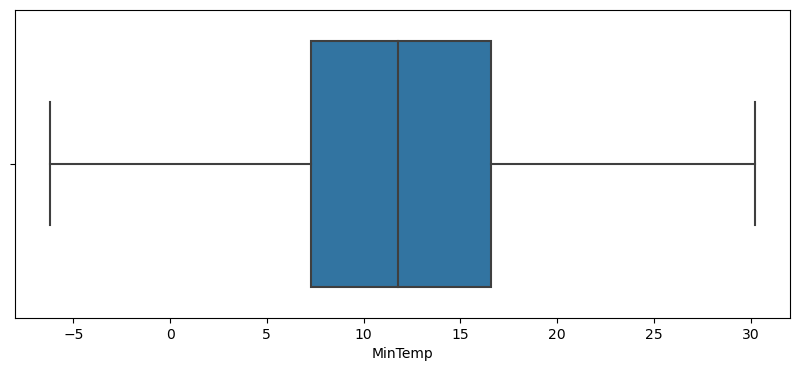

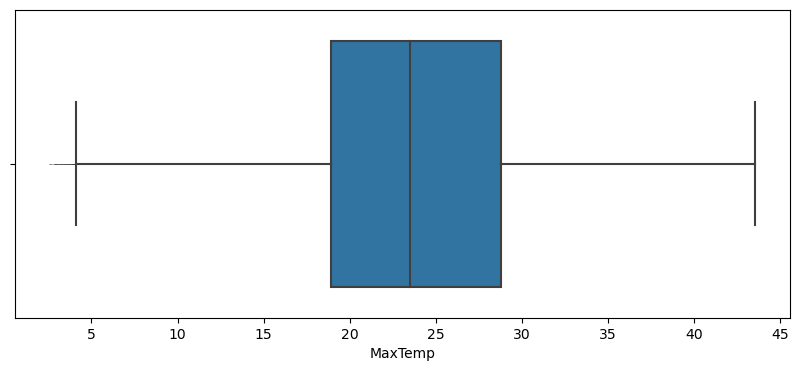

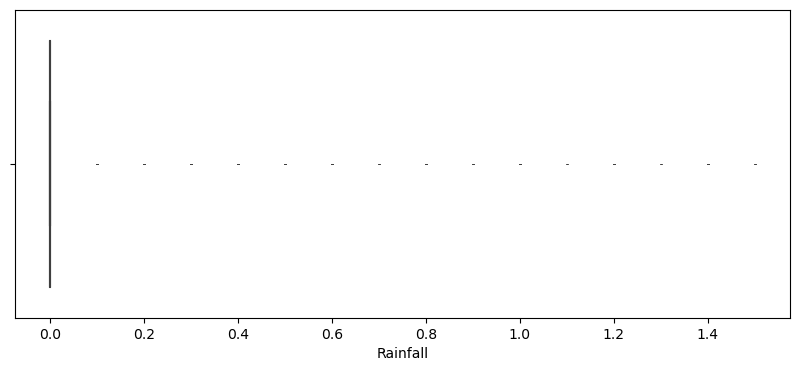

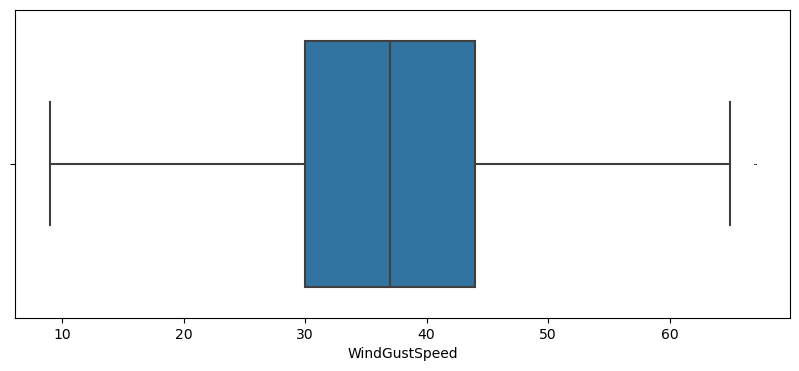

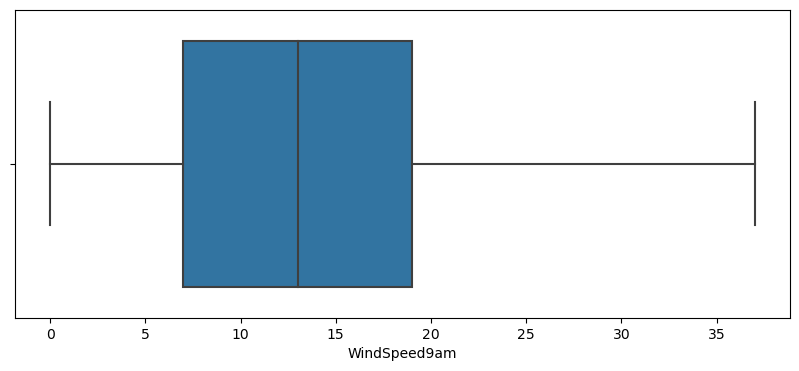

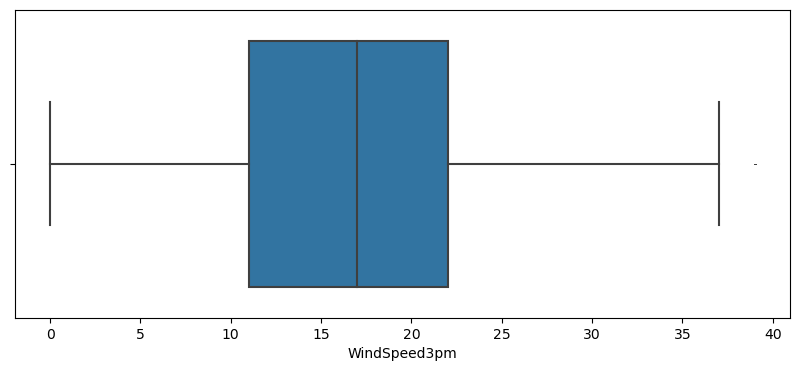

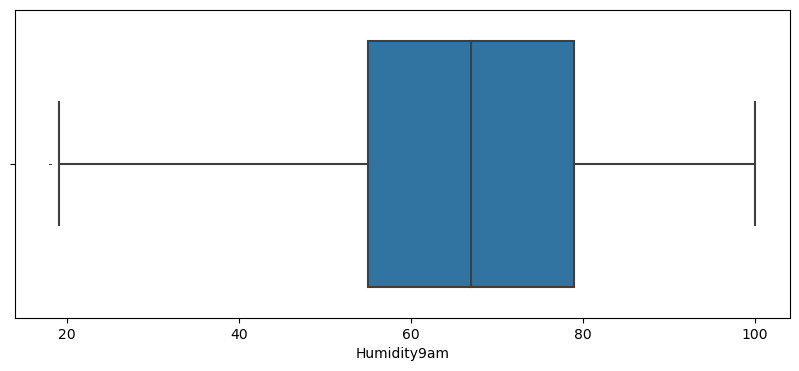

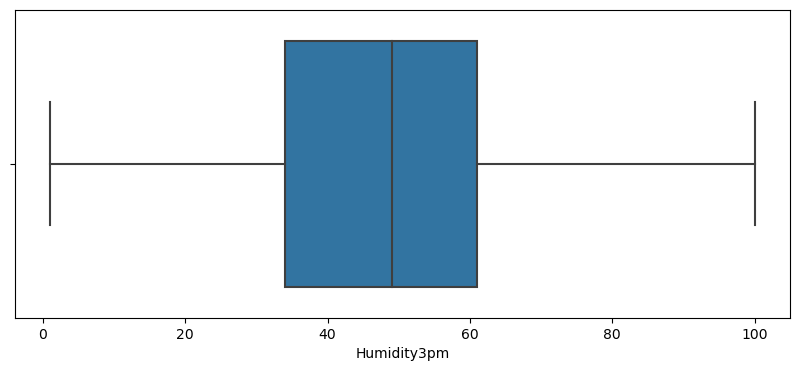

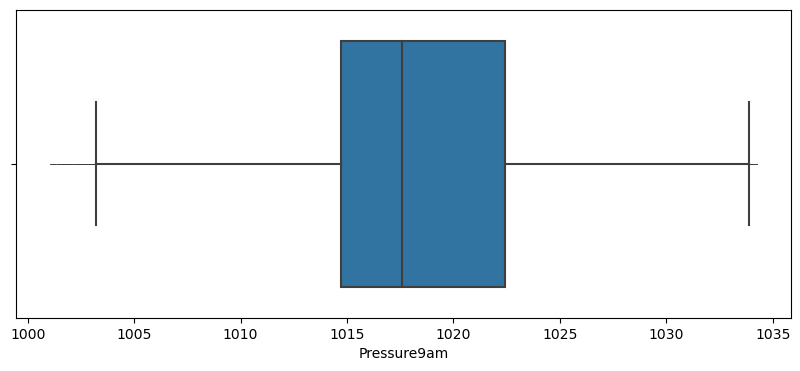

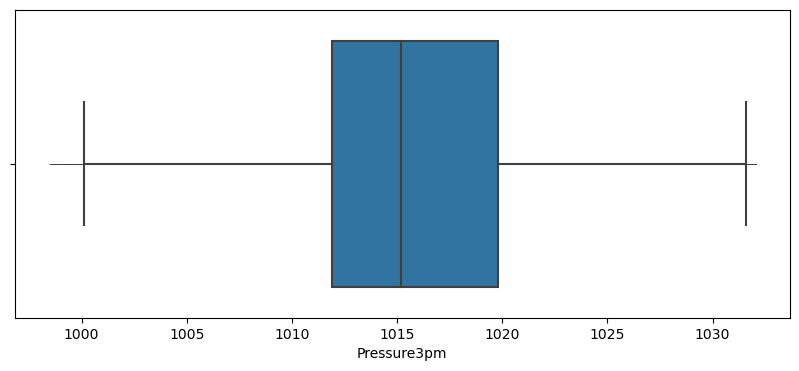

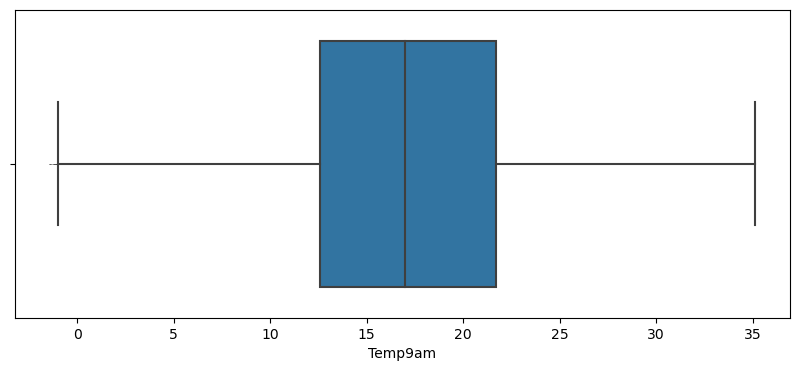

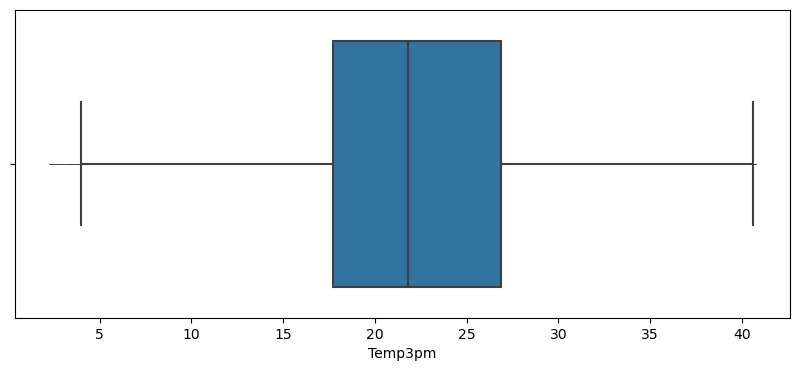

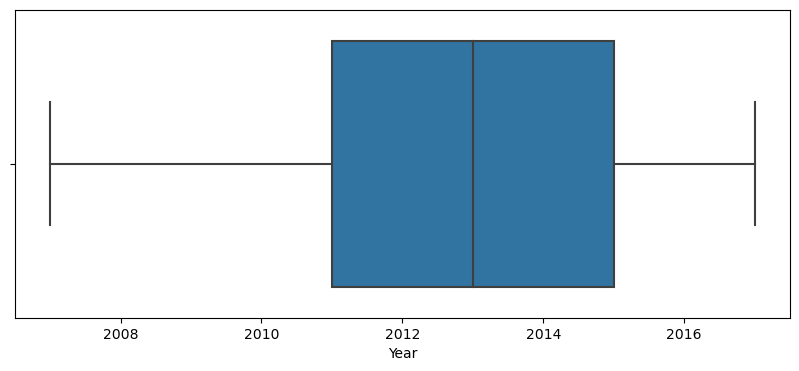

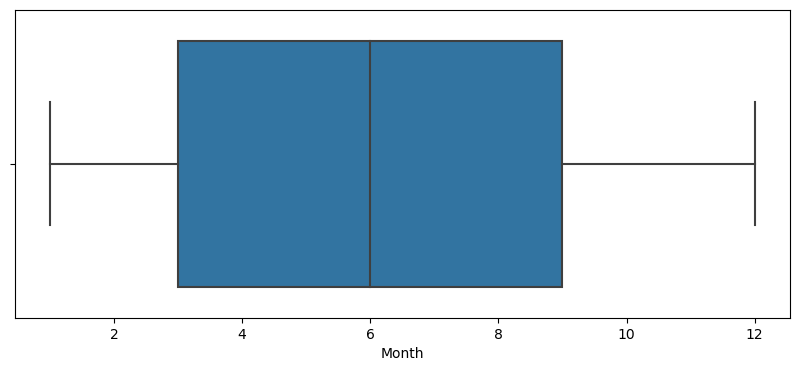

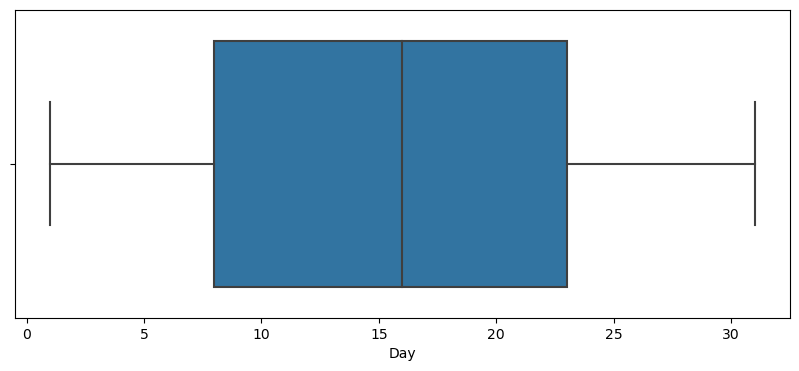

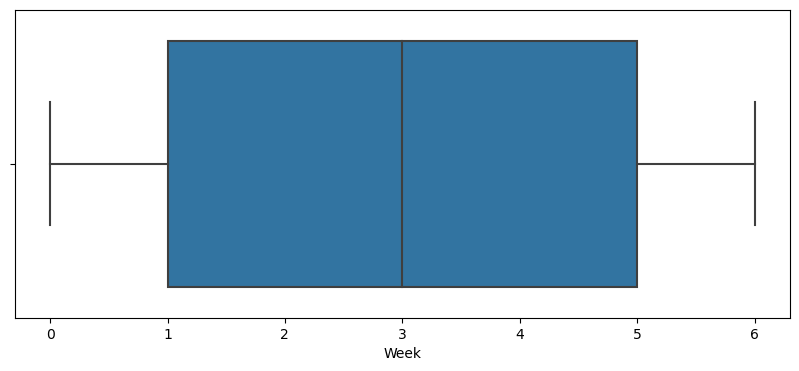

In [35]:
# cek boxplot setelah dihapus outliers
for col in numerical_col_new:
    fig, ax = plt.subplots(1,1, figsize=(10, 4))

    sns.boxplot(df_no_outliers[col], fliersize=0.1)

In [36]:
df_no_outliers

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,0,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,1,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,2,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,3,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No,2017,6,1,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,2017,6,2,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,2017,6,3,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,2017,6,4,23


Data berkurang dari (142193, 22) menjadi (105507, 22)

### Encoding categorical columns

In [37]:
le =  LabelEncoder()

df_no_outliers['RainTomorrow'] = le.fit_transform(df_no_outliers['RainTomorrow'])

# Encoding kolom rain today
df_no_outliers['RainToday'] = le.fit_transform(df_no_outliers['RainToday'])

df_no_outliers

C:\Users\hp\AppData\Local\Temp\ipykernel_28840\1573767792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['RainTomorrow'] = le.fit_transform(df_no_outliers['RainTomorrow'])
C:\Users\hp\AppData\Local\Temp\ipykernel_28840\1573767792.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['RainToday'] = le.fit_transform(df_no_outliers['RainToday'])


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,0,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,1,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,2,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,3,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,2017,6,1,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,2017,6,2,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0,2017,6,3,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0,2017,6,4,23


In [38]:
# Daftar kolom kategorikal yang akan diencode menggunakan One-Hot Encoding.
cat_col = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [39]:
dummies = pd.get_dummies(df_no_outliers, cat_col, drop_first=True)
final_df = dummies
final_df

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,2,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,4,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0,2017,6,1,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0,2017,6,2,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [40]:
X = final_df.drop(['RainTomorrow'], axis=1) # variabel independent atau fitur
Y = final_df['RainTomorrow'] # variabel dependent atau target
X.shape, Y.shape

((105507, 110), (105507,))

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Pendefinisian, Pelatihan, dan Evaluasi Model

#### 1. Logistic Regression

In [42]:
parsams_lr = {'solver':'liblinear',
               'multi_class':'auto',
               'penalty': 'l1'}

logreg  =  LogisticRegression(**parsams_lr)

In [43]:
logreg.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

In [44]:
# predik dari train dan test data
x_train_preds = logreg.predict(X_train)
x_test_preds = logreg.predict(X_test)

Train accuracy : 87.41 %
Test accuracy : 87.24 %


<AxesSubplot:>

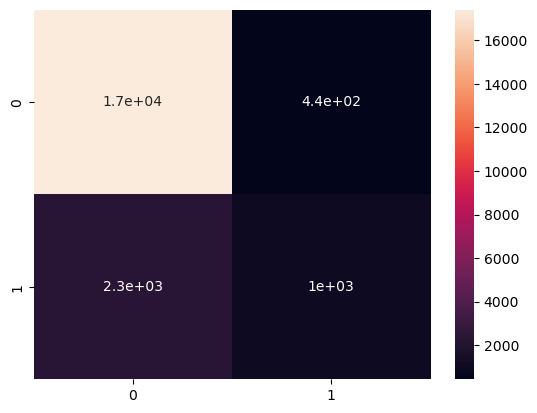

In [45]:
# Accuracy score
train_logreg_accuracy = accuracy_score(Y_train, x_train_preds)
test_logreg_accuracy = accuracy_score(Y_test, x_test_preds )

print("Train accuracy :", round(train_logreg_accuracy*100, 2),'%')
print("Test accuracy :", round(test_logreg_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(Y_test, x_test_preds)
sns.heatmap(cm, annot=True)

#### 2. SVM

In [46]:
# svm = SVC()

In [47]:
# svm.fit(X_train, Y_train)

In [48]:
# # Predicting of training and test data
# x_train_preds = svm.predict(X_train)
# x_test_preds = svm.predict(X_test)

In [49]:
# # Accuracy score
# train_svm_accuracy = accuracy_score(Y_train, x_train_preds)

# print('Accuracy of svm training data:', round(train_svm_accuracy*100, 2),'%')
# print('=========================================================')

# train_svm_accuracy = accuracy_score(Y_test, x_test_preds )
# print('Accuracy of svm test data:', round(train_svm_accuracy*100,2),'%')

# # Confusion matrix
# cm  = confusion_matrix(Y_test, x_test_preds)
# sns.heatmap(cm, annot=True)

#### 3. Deccision Tree

In [50]:
params_dtc = {'criterion':'gini', 
              'max_depth':50,  
             'min_samples_split':10, 
             'min_samples_leaf':10}

modelDT = DecisionTreeClassifier(**params_dtc)

In [51]:
modelDT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=50, min_samples_leaf=10, min_samples_split=10)

In [52]:
# Predicting of training and test data
x_train_preds = modelDT.predict(X_train)
x_test_preds = modelDT.predict(X_test)

Train accuracy : 90.67 %
Test accuracy : 84.6 %


<AxesSubplot:>

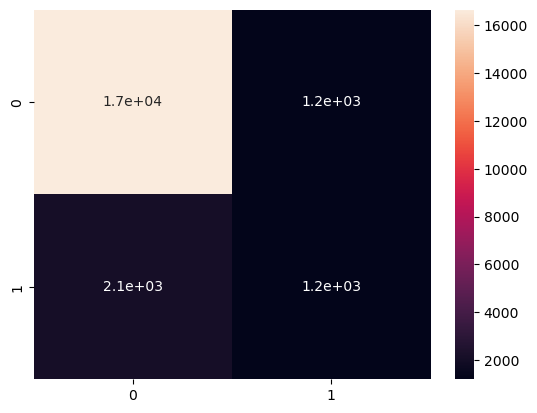

In [53]:
# Accuracy score
train_DT_accuracy = accuracy_score(Y_train, x_train_preds)
test_DT_accuracy = accuracy_score(Y_test, x_test_preds )

print("Train accuracy :", round(train_DT_accuracy*100, 2),'%')
print("Test accuracy :", round(test_DT_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(Y_test, x_test_preds)
sns.heatmap(cm, annot=True)

#### 4. Random Forest

In [54]:
params_rfc = {'max_depth' : 30,
        'min_samples_leaf': 10,
        'min_samples_leaf': 10}
modelRF = RandomForestClassifier(**params_rfc)

In [55]:
modelRF.fit(X_train, Y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=10)

In [56]:
# Predicting of training and test data
x_train_preds = modelRF.predict(X_train)
x_test_preds = modelRF.predict(X_test)

Train accuracy : 88.75 %
Test accuracy : 87.12 %


<AxesSubplot:>

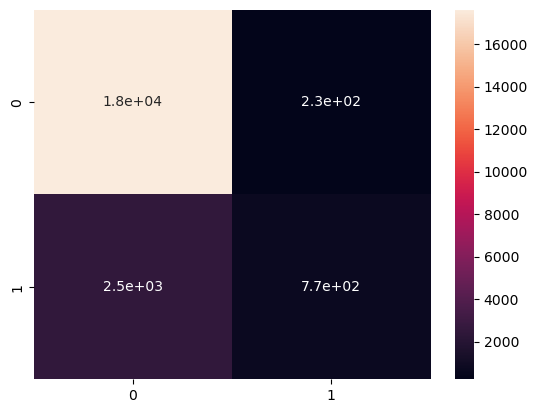

In [57]:
# Accuracy score
train_RF_accuracy = accuracy_score(Y_train, x_train_preds)
test_RF_accuracy = accuracy_score(Y_test, x_test_preds )

print("Train accuracy :", round(train_RF_accuracy*100, 2),'%')
print("Test accuracy :", round(test_RF_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(Y_test, x_test_preds)
sns.heatmap(cm, annot=True)

# scale dan resample data, kemudian train kembali

### 1. Resampling

In [59]:
# import counter
from collections import Counter

print('Y sebelum over resampling:', Counter(Y))

Y sebelum over resampling: Counter({0: 89379, 1: 16128})


In [60]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_res, Y_res = SMOTE.fit_resample(X, Y)

In [61]:
print('Y setelah over resampling:', Counter(Y_res))

Y setelah over resampling: Counter({0: 89379, 1: 89379})


In [62]:
# Splitting data ke training dan testing data
x_train, x_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.2, random_state=0)

### 2. Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(x_train, y_train)
scaler.transform(x_test)

array([[0.72451791, 0.57212714, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81469487, 0.73170113, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.6969697 , 0.54523227, 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46280992, 0.35696822, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.67217631, 0.67481663, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.64738292, 0.63325183, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Modelling

#### 1. Logistic Regression

In [64]:
parsams_lr = {'solver':'liblinear',
               'multi_class':'auto',
               'penalty': 'l1'}

logregScale  =  LogisticRegression(**parsams_lr)

In [65]:
logregScale.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(penalty='l1', solver='liblinear')

In [66]:
# Predicting of training and test data
x_train_preds = logregScale.predict(x_train)
x_test_preds = logregScale.predict(x_test)

Train accuracy : 90.49 %
Test accuracy : 90.58 %


<AxesSubplot:>

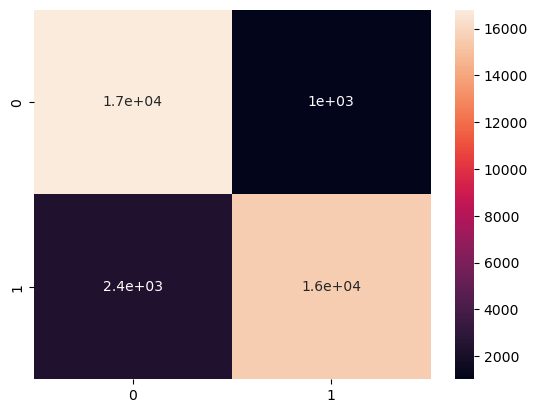

In [67]:
# Accuracy score
train_logreg_accuracy = accuracy_score(y_train, x_train_preds)
test_logreg_accuracy = accuracy_score(y_test, x_test_preds )

print("Train accuracy :", round(train_logreg_accuracy*100, 2),'%')
print("Test accuracy :", round(test_logreg_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(y_test, x_test_preds)
sns.heatmap(cm, annot=True)

#### 2. SVM

In [89]:
# svmScal = SVC()

In [ ]:
# svmScal.fit(x_train, y_train)

In [70]:
# # Predicting of training and test data
# x_train_preds = svmScal.predict(x_train)
# x_test_preds = svmScal.predict(x_test)

In [71]:
# # Accuracy score
# train_svm_accuracy = accuracy_score(y_train, x_train_preds)

# print('Accuracy of svm training data:', round(train_svm_accuracy*100, 2),'%')
# print('=========================================================')

# train_svm_accuracy = accuracy_score(y_test, x_test_preds )
# print('Accuracy of svm test data:', round(train_svm_accuracy*100,2),'%')

# # Confusion matrix
# cm  = confusion_matrix(y_test, x_test_preds)
# sns.heatmap(cm, annot=True)

#### 3. DecisionTree

In [72]:
params_dtc = {'criterion':'gini', 
              'max_depth':30,  
             'min_samples_split':10, 
             'min_samples_leaf':10}

modelDTScale = DecisionTreeClassifier(**params_dtc)

In [73]:
modelDTScale.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, min_samples_split=10)

In [74]:
# Predicting of training and test data
x_train_preds = modelDTScale.predict(x_train)
x_test_preds = modelDTScale.predict(x_test)

Train accuracy : 91.84 %
Test accuracy : 86.67 %


<AxesSubplot:>

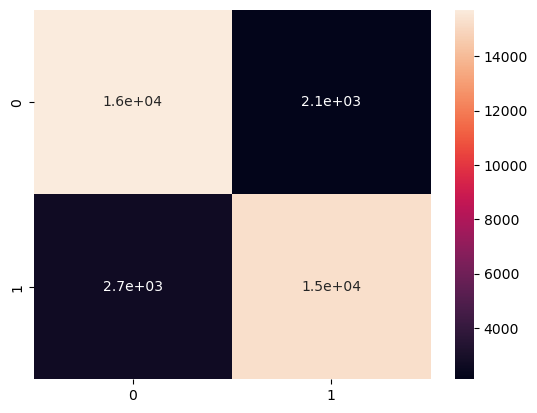

In [75]:
# Accuracy score
train_DTScale_accuracy = accuracy_score(y_train, x_train_preds)
tes_DTScale_accuracy = accuracy_score(y_test, x_test_preds )

print("Train accuracy :", round(train_DTScale_accuracy*100, 2),'%')
print("Test accuracy :", round(tes_DTScale_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(y_test, x_test_preds)
sns.heatmap(cm, annot=True)

#### 4.RandomForest

In [76]:
params_rfc = {'max_depth' : 30,
        'min_samples_leaf': 10,
        'min_samples_leaf': 10}

modelRFScale = RandomForestClassifier(**params_rfc)

In [77]:
modelRFScale.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=10)

In [78]:
# Predicting of training and test data
x_train_preds = modelRFScale.predict(x_train)
x_test_preds = modelRFScale.predict(x_test)

Train accuracy : 92.98 %
Test accuracy : 90.74 %


<AxesSubplot:>

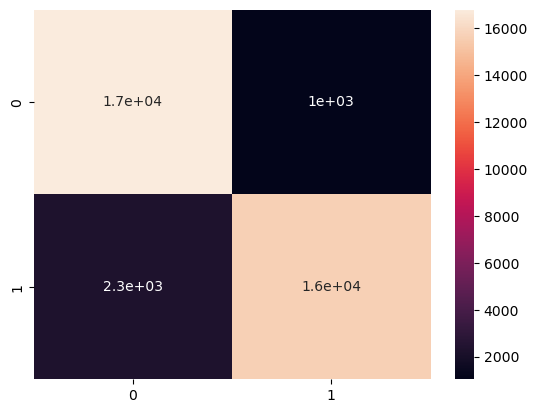

In [79]:
# Accuracy score
train_RFScale_accuracy = accuracy_score(y_train, x_train_preds)
tes_RFScale_accuracy = accuracy_score(y_test, x_test_preds )

print("Train accuracy :", round(train_RFScale_accuracy*100, 2),'%')
print("Test accuracy :", round(tes_RFScale_accuracy*100,2),'%')

# Confusion matrix
cm  = confusion_matrix(y_test, x_test_preds)
sns.heatmap(cm, annot=True)

### Buat fitur baru

# Model Interface

tes model dengan nilai lain diluar dataset

In [80]:
# Tes model dengan data random untuk memprediksi memprediksi cuaca
def predict_cuaca(model, data):
    data = np.array(data).reshape(1, -1)
    hasil = model.predict(data)
    if hasil == 0:
        return 'Cerah'
    elif hasil == 1:
        return 'Berawan'
    elif hasil == 2:
        return 'Hujan Ringan'
    elif hasil == 3:
        return 'Hujan Lebat'

In [85]:
#  Pengetesan Logistic Regression dengan data random beserta akurasinya
import random

data = X.iloc[random.randint(0, len(X))]
print('Data adalah\n', data)
print('Hasil prediksi cuaca adalah', predict_cuaca(logreg, data))
# persentase akurasi dari data random
print('Persentase akurasi dari data random adalah', round(logreg.score(X, Y)*100, 2), '%')
print('=========================================================')

Data adalah
 MinTemp           13.7
MaxTemp           21.4
Rainfall           0.0
WindGustSpeed     41.0
WindSpeed9am      20.0
                  ... 
WindDir3pm_SSW     0.0
WindDir3pm_SW      0.0
WindDir3pm_W       0.0
WindDir3pm_WNW     0.0
WindDir3pm_WSW     0.0
Name: 76077, Length: 110, dtype: float64
Hasil prediksi cuaca adalah Cerah
Persentase akurasi dari data random adalah 87.38 %


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [87]:
#  Pengetesan Decision Tree dengan data random beserta akurasinya

data = X.iloc[random.randint(0, len(X))]
print('Data adalah\n', data)
print('Hasil prediksi cuaca adalah', predict_cuaca(modelDTScale, data))
# persentase akurasi dari data random
print('Persentase akurasi dari data random adalah', round(modelDTScale.score(X, Y)*100, 2), '%')
print('=========================================================')

Data adalah
 MinTemp           12.6
MaxTemp           26.4
Rainfall           0.0
WindGustSpeed     41.0
WindSpeed9am      24.0
                  ... 
WindDir3pm_SSW     0.0
WindDir3pm_SW      0.0
WindDir3pm_W       0.0
WindDir3pm_WNW     0.0
WindDir3pm_WSW     0.0
Name: 92295, Length: 110, dtype: float64
Hasil prediksi cuaca adalah Berawan
Persentase akurasi dari data random adalah 87.43 %


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [88]:
#  Pengetesan Random Tree dengan data random beserta akurasinya

data = X.iloc[random.randint(0, len(X))]
print('Data adalah\n', data)
print('Hasil prediksi cuaca adalah', predict_cuaca(modelRFScale, data))
# persentase akurasi dari data random
print('Persentase akurasi dari data random adalah', round(modelRFScale.score(X, Y)*100, 2), '%')
print('=========================================================')

Data adalah
 MinTemp           17.5
MaxTemp           28.9
Rainfall           0.0
WindGustSpeed     52.0
WindSpeed9am      33.0
                  ... 
WindDir3pm_SSW     0.0
WindDir3pm_SW      0.0
WindDir3pm_W       0.0
WindDir3pm_WNW     0.0
WindDir3pm_WSW     0.0
Name: 144447, Length: 110, dtype: float64
Hasil prediksi cuaca adalah Cerah


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Persentase akurasi dari data random adalah 89.4 %


# Kesimpulan

Dalam project ini, diberi 22 atribut untuk digunakan dalam memprediksi atribut "RainTomorrow". Data diimport terlebih dahulu dan ditinjau propertinya beserta persentase null dalam setiap kolom. Ditemukan bahwa data set terdiri dari 23 kolom dan 145460 baris. Kemudian, data dibersihkan (Data Cleaning) dengan menghapus kolom yang memiliki nilai null lebih dari 38%, menghapus data yang memiliki nilai null pada kolom target, mengganti nilai null dengan rata-rata (numerikal) dan modus (categorical), dan mengonversikan kolom tanggal ke format DateTime.

Setelah itu, dilakukan exploratory data analysis untuk mengetahui sifat-sifat yang ada pada data secara visual. Setelah mengetahui komposisi dari data, dilakukan Data Preprocessing. Tahapan ini termasuk menghapus outlier untuk menguarngi variabilitas data dan melakukan encoding pada data categorical. Setelah itu, dilakukan model training dengan menggunakan algoritma Logistic Regression, SVM (tetapi kekuatan komputer kurang memadai), Decision Tree dan Random Forest. Dari training tersebut, terlihat akurasi hanya mencapai 85-90%. Mencoba untuk mendapatkan hasil yang lebih baik, dilakukan data scaling dan resampling. Setelah itu, dilakukan pembuatan model ulang dari masing-masing algoritma. Ditemukan bahwa hasil dari model-model tersebut lebih akurat daripada sebelum dilakukan resampling dan scaling. Hal ini karena resamping mengambil data-data yang bersifat minoritas secara berulang hingga data menjadi optimal dan scaling menjadikan semua fitur berada pada skala yang sama sehingga mencegah terjadinya keterjebakan dalam local optima. Akurasi tertinggi diperoleh oleh model Random Forest. 

Setelah itu, dibuat Model Interface yang dapat digunakan untuk pengaplikasian prediksi data. Seluruh algoritma dicoba dalam Model Interface tersebut dengan menggunakan data random yang diambil dalam data set. Ditemukan bahwa Random Forest juga memberikan akurasi paling tinggi dalam skenario ini.